In [1]:
import pandas as pd  

In [2]:
csv = pd.read_csv("C:/Users/MMMer/Desktop/CNN/UrbanSound8K/metadata/UrbanSound8K.csv")
csv.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [3]:
csv["fold"].unique()

array([ 5, 10,  2,  6,  1,  9,  7,  4,  3,  8], dtype=int64)

In [4]:
csv["class"].unique()

array(['dog_bark', 'children_playing', 'car_horn', 'air_conditioner',
       'street_music', 'gun_shot', 'siren', 'engine_idling', 'jackhammer',
       'drilling'], dtype=object)

In [5]:
csv["classID"].unique()

array([3, 2, 1, 0, 9, 6, 8, 5, 7, 4], dtype=int64)

In [6]:
csv["salience"].unique()

array([1, 2], dtype=int64)

In [7]:
for i in csv["fold"].unique():
    print((csv["fold"] == i).sum())

936
837
888
823
873
816
838
990
925
806


In [8]:
print(len(csv))

8732


In [9]:
import librosa 
import numpy as np
import cv2
from IPython.display import display, Image
import os

In [10]:
def create_spectrogram(y):
    spec = librosa.feature.melspectrogram(y=y)
    spec_conv = librosa.amplitude_to_db(spec, ref=np.max)
    return spec_conv

In [11]:
# for j in range(1,11):
#     folder_path = f"C:/Users/MMMer/Desktop/CNN/UrbanSound8K/audio/fold{j}/"
#     file_names = os.listdir(folder_path)
#     file_names_array = []
#     for i in file_names:
#         file_names_array.append(i)
#     file_names_array.remove(".DS_Store")
#     for i in file_names_array:
#         audio_path = f"C:/Users/MMMer/Desktop/CNN/UrbanSound8K/audio/fold{j}/{i}"
#         y, sr = librosa.load(audio_path, sr=None)
#         spectrogram = create_spectrogram(y)
#     for i in file_names_array:
#         file_name, file_extension = os.path.splitext(i)
#         cv2.imwrite(f'C:/Users/MMMer/Desktop/CNN/spectrogram/audio/fold{j}/{file_name}.png', spectrogram.astype(np.uint8))

In [12]:
#display(Image(filename="C:/Users/MMMer/Desktop/CNN/spectrogram/audio/fold1/7061-6-0-0.png"))

In [13]:
def image_to_matrix(image_path):
    img = cv2.imread(image_path)
    image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    matrix = np.array(image)
    height, width = matrix.shape
    return width, height

In [14]:
def matrix_to_resize_and_normalize(target_size, image_path):
    img = cv2.imread(image_path)
    image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    matrix = np.array(image)
    resize_matrix = cv2.resize(matrix, target_size)
    # normalize_matrix = resize_matrix.astype("float32") / 255
    return resize_matrix

In [15]:
file_names_array = []
for j in range(1,11):
    folder_path = f"C:/Users/MMMer/Desktop/CNN/spectrogram/audio/fold{j}/"
    file_names = os.listdir(folder_path)
    for i in file_names:
        image_path = f"C:/Users/MMMer/Desktop/CNN/spectrogram/audio/fold{j}/{i}"
        matrix = matrix_to_resize_and_normalize((448, 448), image_path)
        i = i.replace('.png', '.wav')
        k = csv.loc[csv["slice_file_name"] == i, "classID"].values[0]
        file_names_array.append([matrix,k])

In [16]:
from sklearn.model_selection import train_test_split
X = []
y = []
for i in file_names_array:
    X.append(i[0])
    y.append(i[1])
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)
print(len(X_train))
print(len(y_train))
print(len(X_val))
print(len(y_val))
print(len(X_test))
print(len(y_test))

5238
5238
1747
1747
1747
1747


In [17]:
np.save("X_train.npy", X_train)
np.save("y_train.npy", y_train)
np.save("X_val.npy", X_val)
np.save("y_val.npy", y_val)
np.save("X_test.npy", X_test)
np.save("y_test.npy", y_test)

X_train = np.load("X_train.npy")  
y_train = np.load("y_train.npy")  
X_val = np.load("X_val.npy")  
y_val = np.load("y_val.npy")  
X_test = np.load("X_test.npy")  
y_test = np.load("y_test.npy")  

In [18]:
X_train = np.load("X_train.npy")  
y_train = np.load("y_train.npy")  
X_val = np.load("X_val.npy")  
y_val = np.load("y_val.npy")  
X_test = np.load("X_test.npy")  
y_test = np.load("y_test.npy") 

In [19]:
from tensorflow.keras import layers, models
import tensorflow as tf
def create_cnn_model(input_shape, num_classes):
    model = models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    return model
input_shape =(448, 448, 1) 
num_classes = 10 
model = create_cnn_model(input_shape, num_classes)

In [20]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-1),
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_val, y_val))

Epoch 1/5


164/164 [==============================] - 526s 3s/step - loss: 1573641.3750 - accuracy: 0.1193 - val_loss: 2.2747 - val_accuracy: 0.1082
Epoch 2/5
164/164 [==============================] - 487s 3s/step - loss: 2.2715 - accuracy: 0.1111 - val_loss: 2.2703 - val_accuracy: 0.1151
Epoch 3/5
164/164 [==============================] - 482s 3s/step - loss: 2.2715 - accuracy: 0.1132 - val_loss: 2.2866 - val_accuracy: 0.1145
Epoch 4/5
164/164 [==============================] - 504s 3s/step - loss: 2.2743 - accuracy: 0.1102 - val_loss: 2.2740 - val_accuracy: 0.0927
Epoch 5/5
164/164 [==============================] - 485s 3s/step - loss: 2.2734 - accuracy: 0.1166 - val_loss: 2.2703 - val_accuracy: 0.1151


55/55 - 23s - loss: 2.2703 - accuracy: 0.1151 - 23s/epoch - 421ms/step


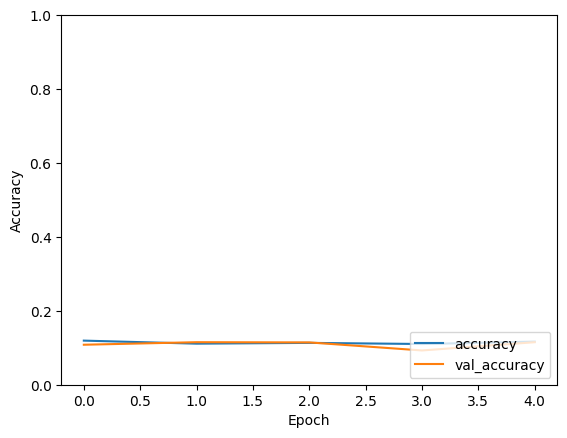

In [21]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(X_val, y_val, verbose=2)